### Recurrent Neural Network (RNN) - Step by Step

To create the basic RNN model, we will create the following functions respectively.

1-

2-

3-

4-



#### 1) RNN Cell Forward

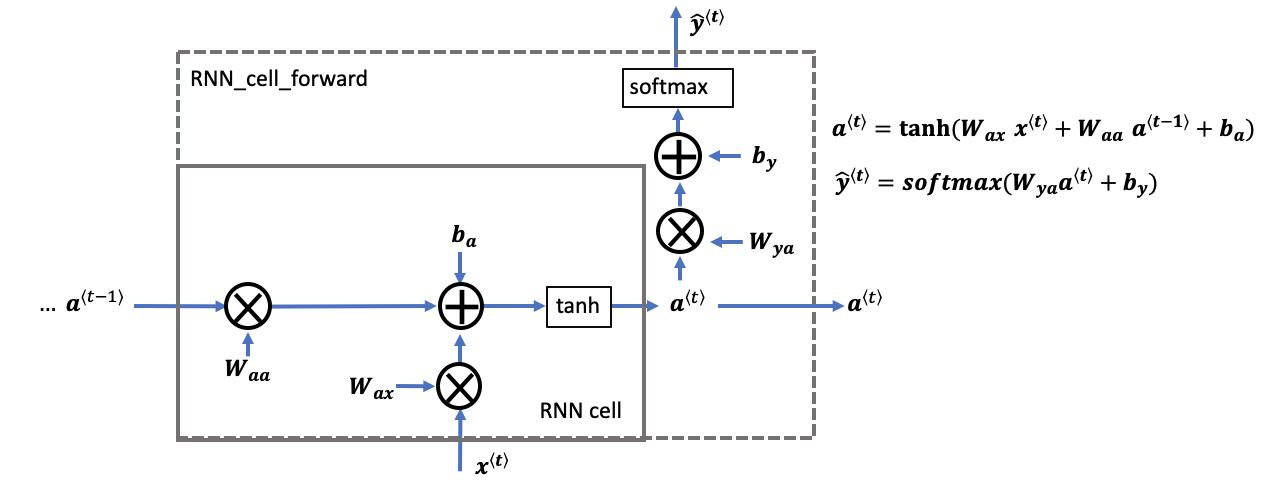

In [1]:
import numpy as np

In [2]:
def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()

In [3]:
def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    

    a_next = np.tanh(np.dot(Waa,a_prev) + np.dot(Wax,xt)+ba)

    yt_pred = softmax(np.dot(Wya,a_next)+by)

    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [4]:
np.random.seed(1)
xt_tmp = np.random.randn(3,10)
a_prev_tmp = np.random.randn(5,10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5,5)
parameters_tmp['Wax'] = np.random.randn(5,3)
parameters_tmp['Wya'] = np.random.randn(2,5)
parameters_tmp['ba'] = np.random.randn(5,1)
parameters_tmp['by'] = np.random.randn(2,1)

a_next_tmp, yt_pred_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)
print("a_next[4] = \n", a_next_tmp[4])
print("a_next.shape = \n", a_next_tmp.shape)
print("yt_pred[1] =\n", yt_pred_tmp[1])
print("yt_pred.shape = \n", yt_pred_tmp.shape)

a_next[4] = 
 [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape = 
 (5, 10)
yt_pred[1] =
 [0.17867403 0.00059564 0.00192797 0.00231747 0.0396566  0.00828257
 0.00990921 0.21155864 0.43903066 0.00713304]
yt_pred.shape = 
 (2, 10)


#### 2) RNN Forward Pass

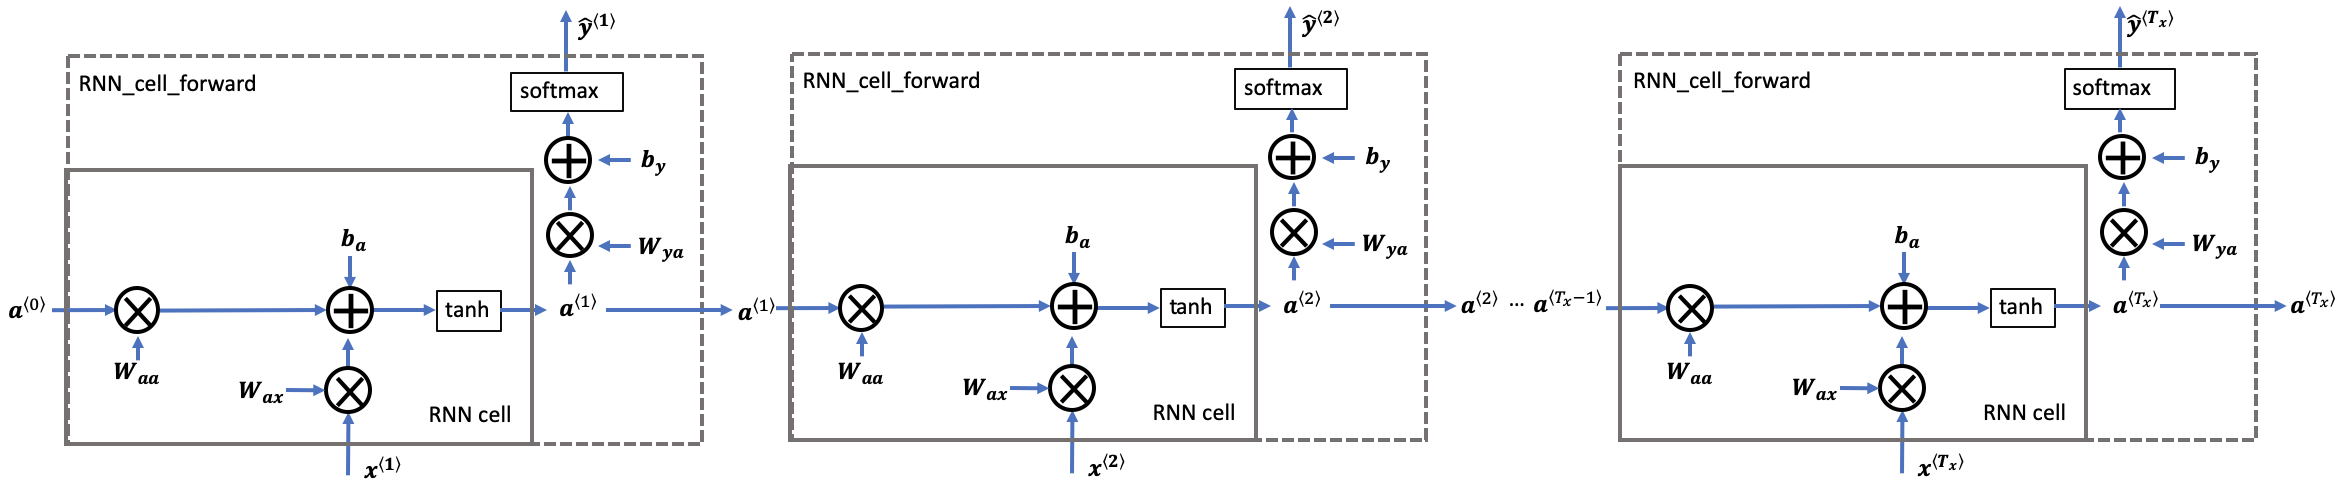

In [5]:
def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    ### START CODE HERE ###
    
    # initialize "a" and "y_pred" with zeros (≈2 lines)
    a =  np.zeros((n_a, m, T_x))
    y_pred =  np.zeros((n_y, m, T_x))
    
    # Initialize a_next (≈1 line)
    a_next = a0
    
    # loop over all time-steps of the input 'x' (1 line)
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache (≈2 lines)

        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = a_next #(na,m)
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches" (≈1 line)
        caches.append(cache)
        
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a, y_pred, caches

In [6]:
bb = np.random.rand(5, 10, 4)
print(bb)
print("================")
print(bb[4][1])
print("---------")
print(bb[:,:,0])
print("---------")
print(bb[:,:,0].shape)

[[[5.24670309e-01 9.24807970e-01 2.63296770e-01 6.59610907e-02]
  [7.35065963e-01 7.72178030e-01 9.07815853e-01 9.31972069e-01]
  [1.39515730e-02 2.34362086e-01 6.16778357e-01 9.49016321e-01]
  [9.50176119e-01 5.56653188e-01 9.15606350e-01 6.41566209e-01]
  [3.90007714e-01 4.85990667e-01 6.04310483e-01 5.49547922e-01]
  [9.26181427e-01 9.18733436e-01 3.94875613e-01 9.63262528e-01]
  [1.73955667e-01 1.26329519e-01 1.35079158e-01 5.05662166e-01]
  [2.15248053e-02 9.47970211e-01 8.27115471e-01 1.50189807e-02]
  [1.76196256e-01 3.32063574e-01 1.30996845e-01 8.09490692e-01]
  [3.44736653e-01 9.40107482e-01 5.82014180e-01 8.78831984e-01]]

 [[8.44734445e-01 9.05392319e-01 4.59880266e-01 5.46346816e-01]
  [7.98603591e-01 2.85718852e-01 4.90253523e-01 5.99110308e-01]
  [1.55332756e-02 5.93481408e-01 4.33676349e-01 8.07360529e-01]
  [3.15244803e-01 8.92888709e-01 5.77857215e-01 1.84010202e-01]
  [7.87929234e-01 6.12031177e-01 5.39092721e-02 4.20193680e-01]
  [6.79068837e-01 9.18601778e-01 4.020

In [7]:
np.random.seed(1)
x_tmp = np.random.randn(3,10,4) #(nx,m,Tx)
a0_tmp = np.random.randn(5,10) #(na,m)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5,5) #(na,na)
parameters_tmp['Wax'] = np.random.randn(5,3) #(na,nx)
parameters_tmp['Wya'] = np.random.randn(2,5) #(ny,na)
parameters_tmp['ba'] = np.random.randn(5,1) #(na,1)
parameters_tmp['by'] = np.random.randn(2,1) #(ny,1)

a_tmp, y_pred_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][1] = \n", a_tmp[4][1])
print("a.shape = \n", a_tmp.shape)
print("y_pred[1][3] =\n", y_pred_tmp[1][3])
print("y_pred.shape = \n", y_pred_tmp.shape)
print("caches[1][1][3] =\n", caches_tmp[1][1][3])
print("len(caches) = \n", len(caches_tmp))

a[4][1] = 
 [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape = 
 (5, 10, 4)
y_pred[1][3] =
 [0.01644489 0.0328586  0.0014877  0.02851197]
y_pred.shape = 
 (2, 10, 4)
caches[1][1][3] =
 [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) = 
 2
